In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
diabetes = datasets.load_diabetes()

In [35]:
diabetes_X = diabetes.data[:, 2, np.newaxis]

In [41]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [37]:
model = LinearRegression()

In [56]:
model.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
pred_train = model.predict(diabetes_X_train)
pred_test = model.predict(diabetes_X_test)

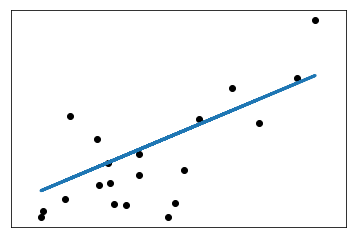

In [65]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, pred_test, linewidth=3)
plt.xticks([])
plt.yticks([])
plt.show()